In [98]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# Carga de los datos

In [99]:
#Datos originales
golden_data=pd.read_csv("./datasets/Colcom2018CleanedScaled.csv",header=0,sep=';')

In [100]:
#Datos adversarios del 2021
advData=pd.read_csv('datasets/Adversarial_data.csv')
cols=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets','source_app_bytes','remote_app_bytes','dns_query_times']
advData.columns=cols
advData['type']='malicious'

In [101]:
#Datos adversarios del 2018
dataAdversarial2018=pd.read_csv("datasets/Colcom2018AdversarialDataTrain.csv",header=0,sep=';')

In [102]:
#Malware generado a traves de interaccion blackbox
maldata2021=pd.read_csv('datasets/malicious_data_generated.csv')
maldata2021.columns=cols
maldata2021['type']='malicious'

# Comparación de los datos de tipo malware

In [103]:
golden_data.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000
mean,1.257622,7.201864,0.245616,1.031517,0.033197,1.205004,1.756605,7.028569,1.011519,0.471112
std,6.177169,41.541732,0.952292,4.855093,0.695257,5.920513,8.144766,37.067494,4.744281,4.723421
min,-0.290698,0.000000,-0.666667,-0.312383,0.000000,-0.322222,-0.282353,-0.164688,-0.324081,-0.750000
25%,-0.220930,0.000000,-0.333333,-0.233104,0.000000,-0.255556,-0.200000,-0.126899,-0.239138,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.779070,0.000000,0.666667,0.766896,0.000000,0.744444,0.800000,0.873101,0.760862,0.500000
max,133.441860,1184.000000,10.666667,109.259173,30.000000,127.488889,147.976471,715.616633,106.407677,227.500000


In [104]:
#Datos originales
golden_data[golden_data.type=='malicious'].describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,0.554860,2.253422,-0.045633,0.557717,0.010825,0.536008,0.863371,3.650236,0.548932,0.422079
std,3.220602,18.069049,0.710032,2.810299,0.351354,3.106805,5.399236,25.833662,2.762755,4.009438
min,-0.290698,0.000000,-0.666667,-0.312383,0.000000,-0.322222,-0.282353,-0.164688,-0.324081,-0.750000
25%,-0.290698,0.000000,-0.666667,-0.312383,0.000000,-0.300000,-0.258824,-0.151903,-0.310083,-0.500000
50%,-0.151163,0.000000,-0.333333,-0.186501,0.000000,-0.133333,-0.117647,-0.099953,-0.158541,-0.250000
75%,0.186047,0.000000,0.333333,0.233372,0.000000,0.177778,0.176471,0.147614,0.222010,0.250000
max,54.406977,898.000000,5.666667,64.528792,12.000000,52.122222,78.423529,387.818441,62.931684,86.250000


In [105]:
#Malware generado a traves de interaccion blackbox
maldata2021.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,-36.873747,-43.074148,-32.785571,-3.418838,-42.597194,4.995992,-30.392786,17.905812,-20.090180,59.875752
std,39.204926,42.480476,50.212121,57.132754,40.686332,56.766909,47.577099,49.094626,55.913282,24.014733
min,-95.000000,-98.000000,-100.000000,-100.000000,-95.000000,-102.000000,-98.000000,-98.000000,-99.000000,-66.000000
25%,-67.000000,-78.500000,-78.000000,-56.500000,-69.000000,-42.000000,-78.000000,2.000000,-61.000000,43.000000
50%,-41.000000,-54.000000,-49.000000,-12.000000,-54.000000,11.000000,-31.000000,28.000000,-38.000000,61.000000
75%,-15.000000,-12.000000,-7.000000,42.000000,-26.000000,52.500000,-4.000000,51.000000,25.000000,79.000000
max,71.000000,102.000000,98.000000,94.000000,92.000000,96.000000,94.000000,100.000000,101.000000,101.000000


In [106]:
#Datos adversarios del 2021
advData.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,-34.250501,-44.072144,-29.917836,-4.370741,-41.442886,3.529058,-24.969940,17.018036,-20.118236,45.579158
std,45.079085,45.689572,52.102379,59.363059,40.642261,59.416648,49.159574,51.146668,56.493452,27.800625
min,-128.000000,-145.000000,-131.000000,-139.000000,-135.000000,-142.000000,-130.000000,-127.000000,-121.000000,-66.000000
25%,-67.000000,-79.000000,-65.500000,-61.500000,-66.000000,-46.500000,-67.000000,-7.500000,-64.500000,24.000000
50%,-39.000000,-56.000000,-40.000000,-4.000000,-53.000000,10.000000,-15.000000,27.000000,-31.000000,48.000000
75%,-3.000000,-11.000000,-3.000000,40.000000,-22.500000,47.500000,6.000000,54.000000,17.000000,66.000000
max,168.000000,112.000000,116.000000,131.000000,92.000000,142.000000,159.000000,118.000000,116.000000,98.000000


In [107]:
#Datos adversarios del 2018
dataAdversarial2018.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
count,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,67.321099,2.124000,-0.030000,30.956041,0.0,63.568732,43.384903,344.051276,31.881315,0.480000
std,39.705018,9.175675,0.665823,36.359889,0.0,37.792974,48.927479,206.944185,36.030482,3.952955
min,-0.124738,0.000000,-0.666667,-0.312383,0.0,-0.272351,-0.282353,0.769021,-0.324081,-0.750000
25%,33.205399,0.000000,-0.333333,-0.033256,0.0,30.686286,0.052941,162.057835,0.078749,-0.500000
50%,65.651707,0.000000,-0.333333,12.349518,0.0,63.654625,19.931683,336.592896,14.566025,-0.250000
75%,102.769899,0.000000,0.333333,60.223916,0.0,96.269249,83.910425,532.482187,65.059143,0.500000
max,133.332947,119.000000,4.333333,109.131622,0.0,127.434770,147.954122,712.607935,106.074349,64.500000


## Graficamente

### Media de los datos de tipo malware generados contra los datos malware originales

In [108]:
#datos para el grafico
colsTemp=['tcp_packets','dist_port_tcp','external_ips','vulume_bytes','udp_packets','source_app_packets','remote_app_packets',' source_app_bytes','remote_app_bytes','dns_query_times']
d={'dataType':cols,'mean_golden_malware':[golden_data[golden_data.type=='malicious'][col].mean() for col in colsTemp],'mean_adv2021':[advData[col].mean() for col in cols],
   'mean_adv_2018':[dataAdversarial2018[col].mean() for col in colsTemp],'mean_mal_2021':[maldata2021[col].mean() for col in cols],'mean_golden_benign':[golden_data[golden_data.type=='benign'][col].mean() for col in colsTemp]}
df=pd.DataFrame(data=d)

In [109]:
df

,dataType,mean_golden_malware,mean_adv2021,mean_adv_2018,mean_mal_2021,mean_golden_benign
0,tcp_packets,0.554860,-34.250501,67.321099,-36.873747,1.728178
1,dist_port_tcp,2.253422,-44.072144,2.124000,-43.074148,10.515242
2,external_ips,-0.045633,-29.917836,-0.030000,-32.785571,0.440631
3,vulume_bytes,0.557717,-4.370741,30.956041,-3.418838,1.348764
4,udp_packets,0.010825,-41.442886,0.000000,-42.597194,0.048177
5,source_app_packets,0.536008,3.529058,63.568732,4.995992,1.652950
6,remote_app_packets,0.863371,-24.969940,43.384903,-30.392786,2.354697
7,source_app_bytes,3.650236,17.018036,344.051276,17.905812,9.290633
8,remote_app_bytes,0.548932,-20.118236,31.881315,-20.090180,1.321257
9,dns_query_times,0.422079,45.579158,0.480000,59.875752,0.503944


([<matplotlib.axis.XTick at 0x1765e4e6160>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

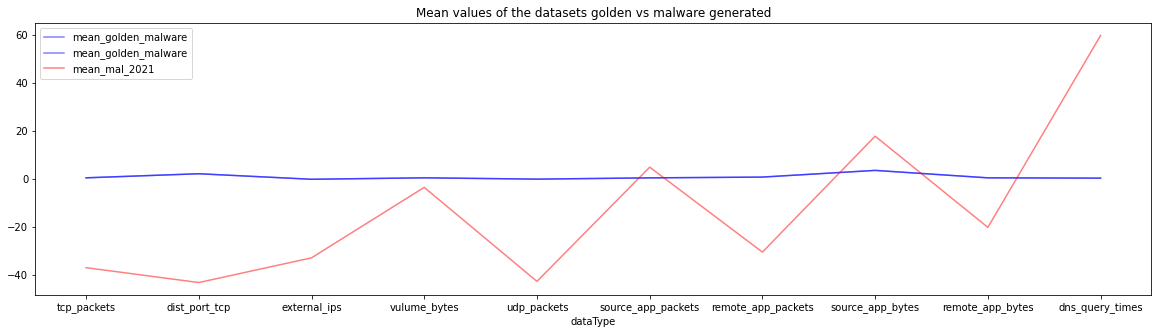

In [110]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets golden vs malware generated')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1765e741b20>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

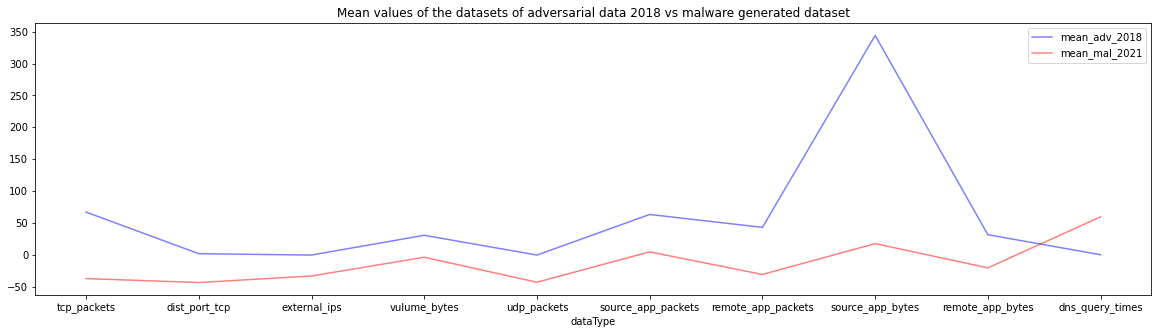

In [111]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_adv_2018',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets of adversarial data 2018 vs malware generated dataset')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1765f0439a0>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

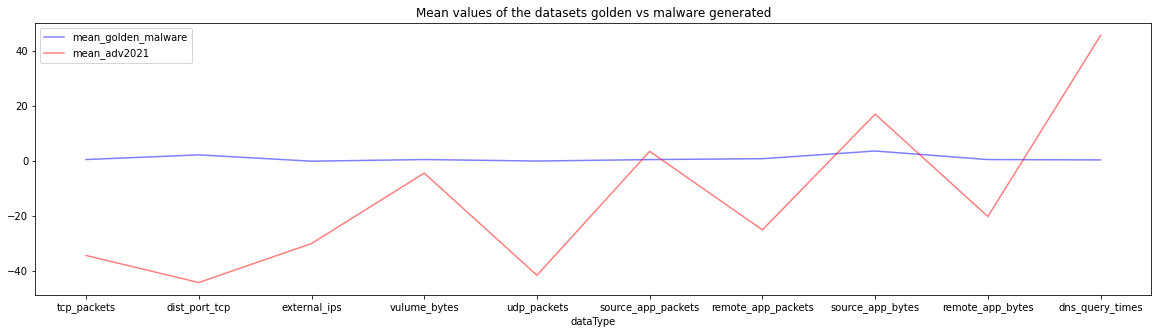

In [112]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets golden vs malware generated')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1765ee7b160>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

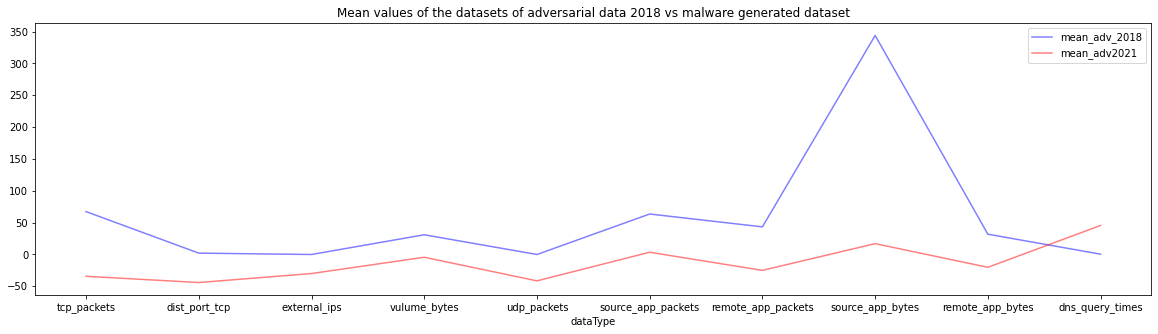

In [113]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_adv_2018',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Mean values of the datasets of adversarial data 2018 vs malware generated dataset')
plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)

([<matplotlib.axis.XTick at 0x1765f45a070>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

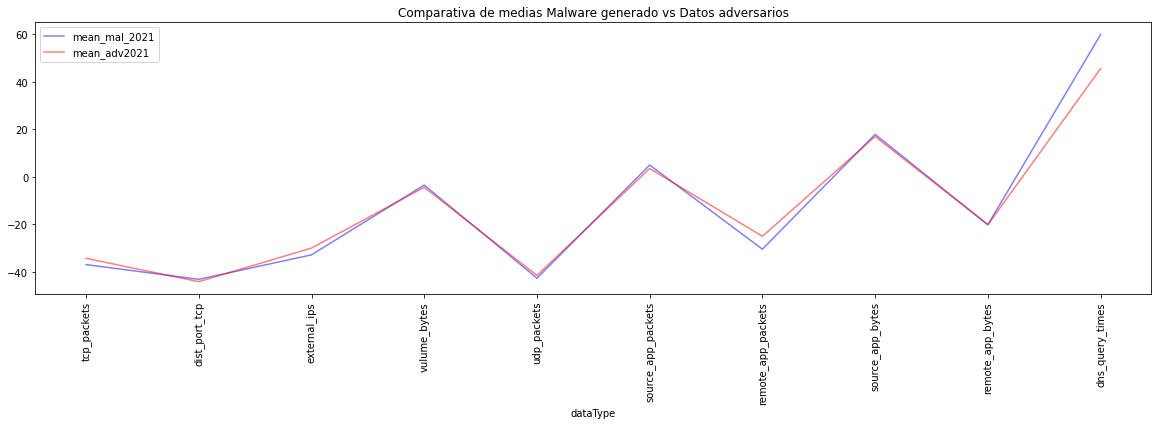

In [114]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_mal_2021',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='red',alpha=0.5)
ax.set_title('Comparativa de medias Malware generado vs Datos adversarios')
plt.rcParams["figure.figsize"]=(10, 5)
plt.xticks(df.index, df['dataType'], rotation=90)

([<matplotlib.axis.XTick at 0x1765f288280>,
 [Text(0, 0, 'tcp_packets'),
  Text(1, 0, 'dist_port_tcp'),
  Text(2, 0, 'external_ips'),
  Text(3, 0, 'vulume_bytes'),
  Text(4, 0, 'udp_packets'),
  Text(5, 0, 'source_app_packets'),
  Text(6, 0, 'remote_app_packets'),
  Text(7, 0, 'source_app_bytes'),
  Text(8, 0, 'remote_app_bytes'),
  Text(9, 0, 'dns_query_times')])

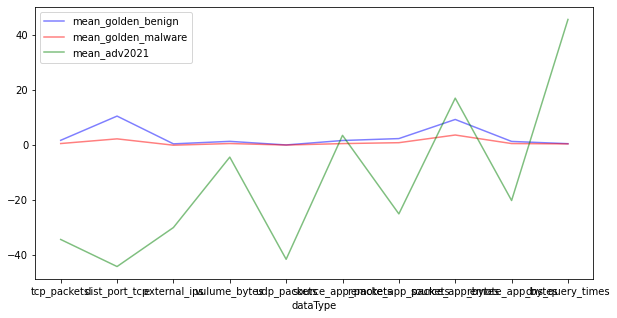

In [115]:
ax=plt.gca()
df.plot(kind='line',x='dataType',y='mean_golden_benign',ax=ax,color='blue',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_golden_malware',ax=ax,color='red',alpha=0.5)
df.plot(kind='line',x='dataType',y='mean_adv2021',ax=ax,color='green',alpha=0.5)

plt.rcParams["figure.figsize"]=(20, 5)
plt.xticks(df.index, df['dataType'], rotation=0)